In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA

import warnings # Ignore all warnings
warnings.filterwarnings("ignore")

# Settings
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
pd.options.display.float_format = '{:.2f}'.format

In [2]:
df = pd.read_csv('../../data/processed_data/data_preprocessed.csv')
df.head()

,recency,total_trips,total_spend,avg_spend,avg_surge,total_tip,avg_tip,avg_rating_given,loyalty_status,avg_distance,avg_duration,active_days,city_Cairo,city_Lagos,city_Nairobi
0,0.73,1.10,0.79,-0.50,-0.76,-0.91,-1.27,1.39,0,-0.54,-0.45,0.15,False,False,True
1,-0.75,-1.37,-1.83,-1.95,-1.26,-2.20,-2.01,0.50,0,-0.25,-0.91,0.72,False,False,True
2,0.13,0.90,0.95,0.34,0.89,-0.61,-0.94,-0.71,0,1.01,-0.11,-1.29,False,True,False
3,1.74,-2.70,-2.87,-1.42,0.32,-2.14,-1.70,1.08,0,1.82,0.17,-1.59,False,False,True
4,-0.01,-0.88,-0.49,0.99,1.86,0.21,0.61,-1.28,1,1.39,1.15,-0.32,False,True,False


In [3]:
# X = df[['recency', 'total_trips', 'total_spend']]
X = df[['recency', 'total_trips', 'avg_spend']]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   recency      10000 non-null  float64
 1   total_trips  10000 non-null  float64
 2   avg_spend    10000 non-null  float64
dtypes: float64(3)
memory usage: 234.5 KB


  File "C:\Users\godfr\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\godfr\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\godfr\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\godfr\anaconda3\Lib\subprocess.

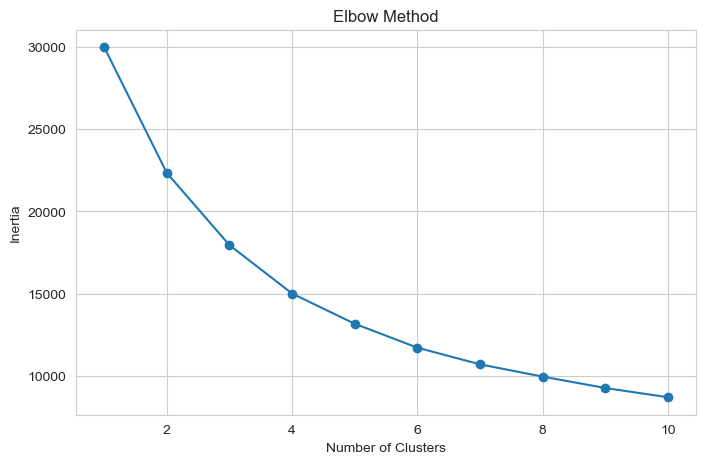

In [4]:
# Elbow method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20, max_iter=500)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot inertia values
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

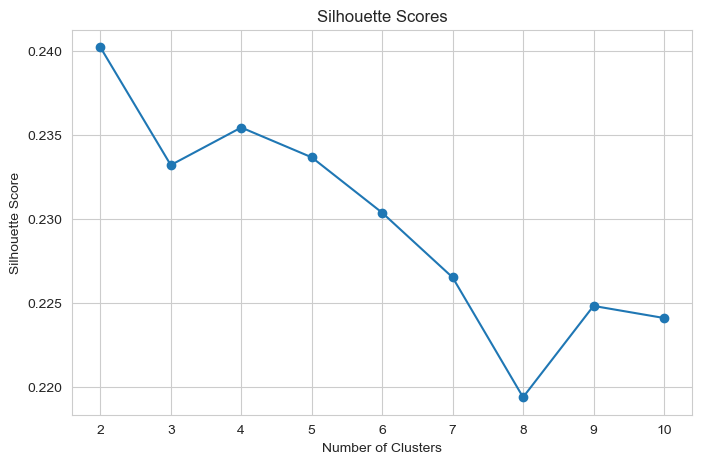

In [5]:
# Compute silhouette scores
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20, max_iter=500)
    kmeans.fit(X)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title("Silhouette Scores")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

In [6]:
K_range = range(2, 11)
sample_n = min(10000, len(X))
inertias, sils, dbs, chs = [], [], [], []

print(f"{'K':>3} | {'Inertia':>12} | {'Silhouette':>10} | {'Davies-B':>9} | {'Calinski-H':>12}")
print("-"*60)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=20, max_iter=500)
    labels = km.fit_predict(X)

    # Sample for silhouette to keep it fast
    sil = silhouette_score(X, labels, sample_size=sample_n, random_state=42)
    db  = davies_bouldin_score(X, labels)
    ch  = calinski_harabasz_score(X, labels)

    inertias.append(km.inertia_); sils.append(sil); dbs.append(db); chs.append(ch)
    print(f"{k:>3} | {km.inertia_:>12,.0f} | {sil:>10.4f} | {db:>9.4f} | {ch:>12,.0f}")

  K |      Inertia | Silhouette |  Davies-B |   Calinski-H
------------------------------------------------------------
  2 |       22,344 |     0.2402 |    1.5658 |        3,426
  3 |       17,952 |     0.2332 |    1.3224 |        3,355
  4 |       15,004 |     0.2354 |    1.2373 |        3,330
  5 |       13,164 |     0.2337 |    1.1650 |        3,196
  6 |       11,709 |     0.2304 |    1.1254 |        3,122
  7 |       10,693 |     0.2265 |    1.1058 |        3,007
  8 |        9,947 |     0.2194 |    1.1395 |        2,878
  9 |        9,253 |     0.2248 |    1.1142 |        2,800
 10 |        8,691 |     0.2241 |    1.1079 |        2,721


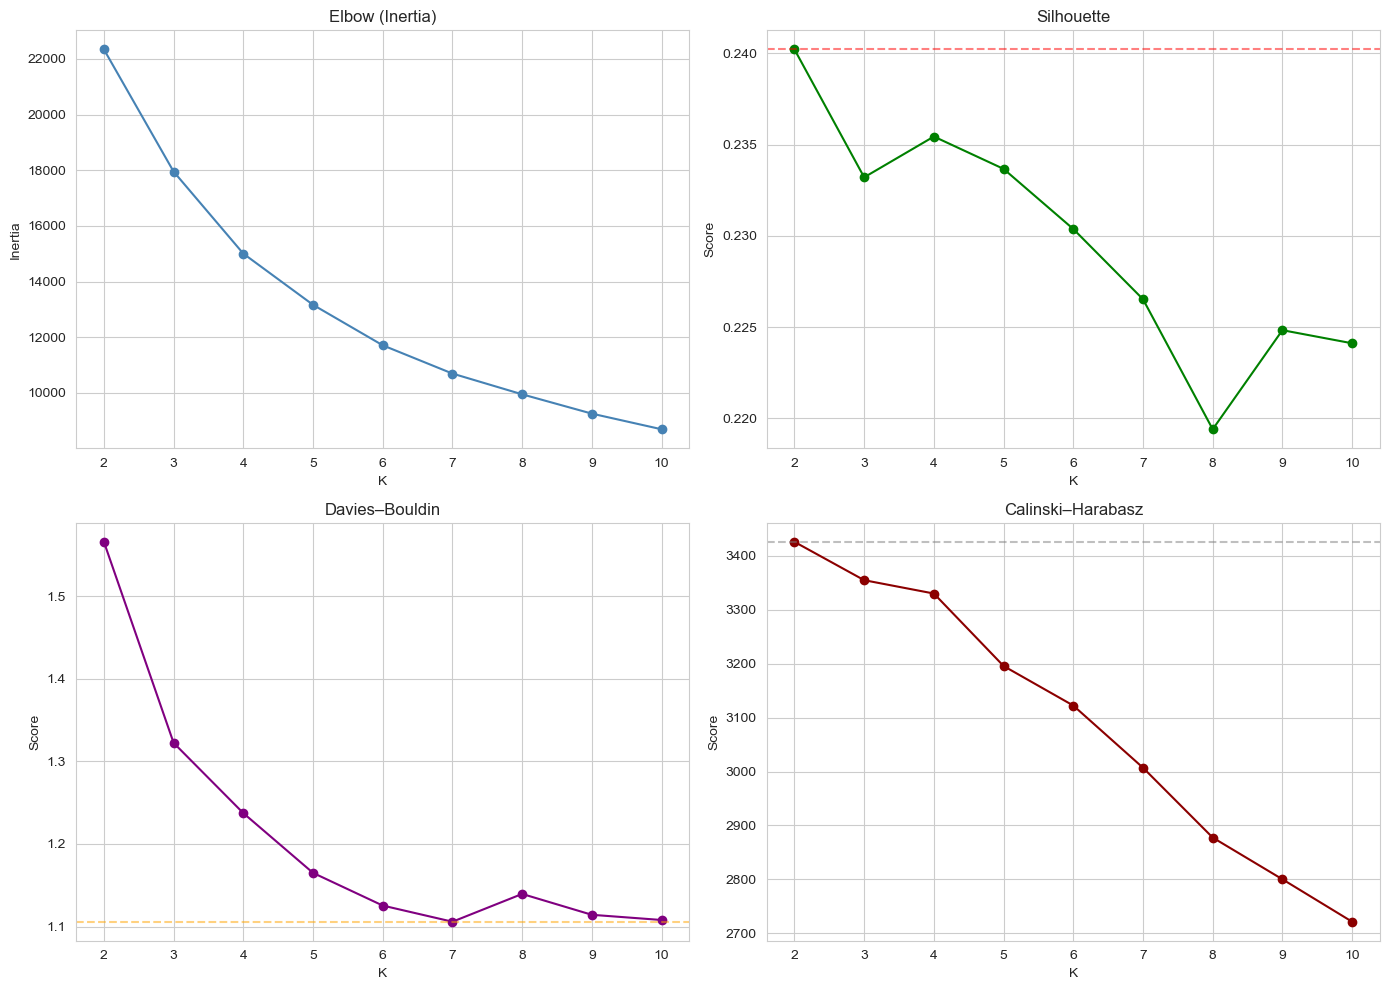

In [7]:
Ks = list(K_range)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Inertia (Elbow)
axes[0,0].plot(Ks, inertias, 'o-', color='steelblue')
axes[0,0].set_title('Elbow (Inertia)')
axes[0,0].set_xlabel('K'); axes[0,0].set_ylabel('Inertia')

# Silhouette (higher better)
axes[0,1].plot(Ks, sils, 'o-', color='green')
axes[0,1].axhline(max(sils), ls='--', color='red', alpha=0.5)
axes[0,1].set_title('Silhouette')
axes[0,1].set_xlabel('K'); axes[0,1].set_ylabel('Score')

# Davies-Bouldin (lower better)
axes[1,0].plot(Ks, dbs, 'o-', color='purple')
axes[1,0].axhline(min(dbs), ls='--', color='orange', alpha=0.5)
axes[1,0].set_title('Davies–Bouldin')
axes[1,0].set_xlabel('K'); axes[1,0].set_ylabel('Score')

# Calinski–Harabasz (higher better)
axes[1,1].plot(Ks, chs, 'o-', color='darkred')
axes[1,1].axhline(max(chs), ls='--', color='gray', alpha=0.5)
axes[1,1].set_title('Calinski–Harabasz')
axes[1,1].set_xlabel('K'); axes[1,1].set_ylabel('Score')

plt.tight_layout()
plt.show()

Analyzing the evaluation metrics generated shows:
- Silhouette Score: This metric is highest at K=2 (0.1383) and decreases as K increases. A higher silhouette score indicates better-defined clusters.
- Calinski-Harabasz Index: Similar to the Silhouette score, this index is highest at K=2 (1,776) and consistently decreases thereafter. A higher Calinski-Harabasz score indicates better clustering.
- Elbow Method (Inertia): While the 'elbow' is not extremely sharp, there's a significant drop in inertia from K=2 to K=3, and then the rate of decrease starts to slow down. A clearer elbow is often visible around K=3 or K=4, but the initial sharpest drop is at K=2.
- Davies-Bouldin Index: This metric aims for lower values. While the absolute lowest is at K=10, there's no clear 'elbow' or consistent minimum in the lower K range, and it fluctuates. K=5 and K=7 are local minima, but the overall trend doesn't strongly contradict K=2 or K=3 as a reasonable starting point.

Conclusion: Both the Silhouette Score and Calinski-Harabasz Index strongly suggest that K=2 is the ideal number of clusters, as they both peak at this value. While the Elbow method might hint at 3 or 4, the other two metrics provide more definitive evidence for K=2.



In [8]:
# Elbow (Inertia), Silhouette, Davies–Bouldin, Calinski–Harabasz

#### Segmenting on 2 clusters

In [9]:
k_selected = 2

sample_n = min(10000, len(X))

final_kmeans = KMeans(
    n_clusters=k_selected,
    random_state=42,
    n_init=20,
    max_iter=500
)
labels = final_kmeans.fit_predict(X)
df['Cluster'] = labels

print(f"✅ Created {k_selected} clusters")
print("\nCluster distribution:")
print(df['Cluster'].value_counts(normalize=True).sort_index())

# Quality metrics
sil = silhouette_score(X, labels, sample_size=sample_n, random_state=42)
db  = davies_bouldin_score(X, labels)
ch  = calinski_harabasz_score(X, labels)
print(f"\nSilhouette: {sil:.4f} | Davies–Bouldin: {db:.4f} | Calinski–Harabasz: {ch:,.0f}")

✅ Created 2 clusters

Cluster distribution:
Cluster
0   0.51
1   0.49
Name: proportion, dtype: float64

Silhouette: 0.2402 | Davies–Bouldin: 1.5658 | Calinski–Harabasz: 3,426


Number of clusters: 2
Centroids shape: (2, 2)


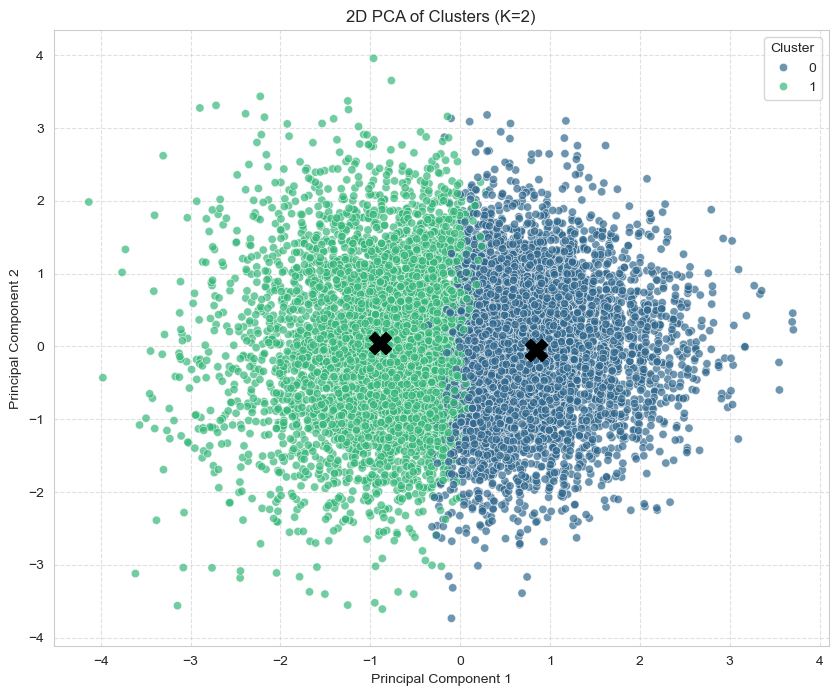

In [10]:
# Apply PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

# Create a DataFrame for plotting
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Cluster'] = df['Cluster']

# Visualize Clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Principal Component 1',
    y='Principal Component 2',
    hue='Cluster',
    data=pca_df,
    palette='viridis',
    legend='full',
    alpha=0.7
)

# Centroids in original feature space
centroids_original = final_kmeans.cluster_centers_

# Project to PCA space
centroids_pca = pca.transform(centroids_original)

# Plot centroids
plt.scatter(
    centroids_pca[:,0], centroids_pca[:,1],
    marker='X', s=250, c='black',
    label='Centroids'
)

print("Number of clusters:", k_selected)
print("Centroids shape:", centroids_pca.shape)
plt.title('2D PCA of Clusters (K=2)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

#### Segmenting on 4 clusters

In [11]:
k_selected = 4

sample_n = min(10000, len(X))

final_kmeans = KMeans(
    n_clusters=k_selected,
    random_state=42,
    n_init=20,
    max_iter=500
)
labels = final_kmeans.fit_predict(X)
df['Cluster'] = labels

print(f"✅ Created {k_selected} clusters")
print("\nCluster distribution:")
print(df['Cluster'].value_counts(normalize=True).sort_index())

# Quality metrics
sil = silhouette_score(X, labels, sample_size=sample_n, random_state=42)
db  = davies_bouldin_score(X, labels)
ch  = calinski_harabasz_score(X, labels)
print(f"\nSilhouette: {sil:.4f} | Davies–Bouldin: {db:.4f} | Calinski–Harabasz: {ch:,.0f}")

✅ Created 4 clusters

Cluster distribution:
Cluster
0   0.26
1   0.25
2   0.24
3   0.25
Name: proportion, dtype: float64

Silhouette: 0.2354 | Davies–Bouldin: 1.2373 | Calinski–Harabasz: 3,330


Number of clusters: 4
Centroids shape: (4, 2)


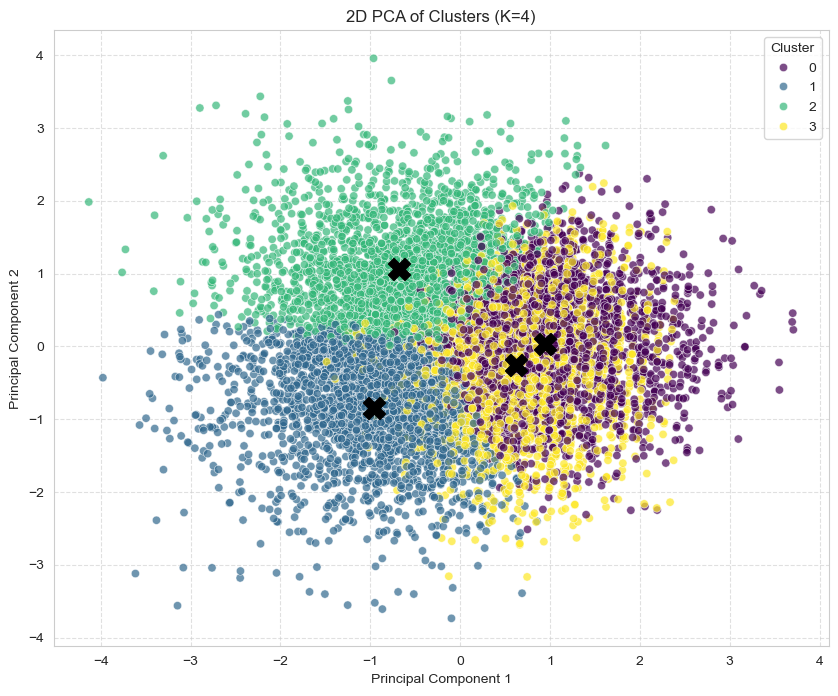

In [12]:
# Apply PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

# Create a DataFrame for plotting
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Cluster'] = df['Cluster']

# Visualize Clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Principal Component 1',
    y='Principal Component 2',
    hue='Cluster',
    data=pca_df,
    palette='viridis',
    legend='full',
    alpha=0.7
)

# Centroids in original feature space
centroids_original = final_kmeans.cluster_centers_

# Project to PCA space
centroids_pca = pca.transform(centroids_original)

# Plot centroids
plt.scatter(
    centroids_pca[:,0], centroids_pca[:,1],
    marker='X', s=250, c='black',
    label='Centroids'
)


print("Number of clusters:", k_selected)
print("Centroids shape:", centroids_pca.shape)
plt.title('2D PCA of Clusters (K=4)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

#### Key Findings and Comparison (K=2 vs K=4)
- Silhouette Score: K=2 (0.1383) is higher than K=4 (0.1020), suggesting better-defined clusters at K=2.
- Davies–Bouldin Score: K=2 (2.3036) is slightly higher than K=4 (2.2020). A lower score is better, so K=4 performs slightly better here, though both are relatively high.
- Calinski–Harabasz Score: K=2 (1,776) is higher than K=4 (1,225), suggesting better clustering at K=2.

Overall, the metrics consistently point towards K=2 as providing a slightly better or more distinct clustering solution compared to K=4, according to the Silhouette and Calinski-Harabasz scores. The Davies-Bouldin score, which ideally should be lower, showed a slightly worse performance for K=2.

These results indicate that the data might not have very strong, clearly separated clusters regardless of the number of clusters chosen, but K=2 offered a marginally better overall quality based on multiple metrics.

In [13]:
k_selected = 3

sample_n = min(10000, len(X))

final_kmeans = KMeans(
    n_clusters=k_selected,
    random_state=42,
    n_init=20,
    max_iter=500
)
labels = final_kmeans.fit_predict(X)
df['Cluster'] = labels

print(f"✅ Created {k_selected} clusters")
print("\nCluster distribution:")
print(df['Cluster'].value_counts(normalize=True).sort_index())

# Quality metrics
sil = silhouette_score(X, labels, sample_size=sample_n, random_state=42)
db  = davies_bouldin_score(X, labels)
ch  = calinski_harabasz_score(X, labels)
print(f"\nSilhouette: {sil:.4f} | Davies–Bouldin: {db:.4f} | Calinski–Harabasz: {ch:,.0f}")

✅ Created 3 clusters

Cluster distribution:
Cluster
0   0.38
1   0.32
2   0.31
Name: proportion, dtype: float64

Silhouette: 0.2332 | Davies–Bouldin: 1.3224 | Calinski–Harabasz: 3,355


Number of clusters: 3
Centroids shape: (3, 2)


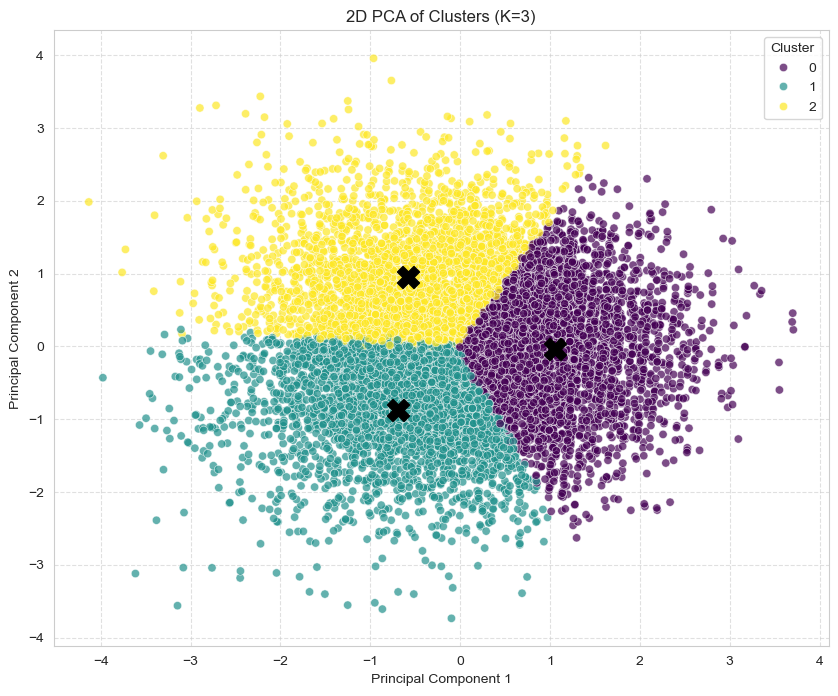

In [14]:
# Apply PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

# Create a DataFrame for plotting
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Cluster'] = df['Cluster']

# Visualize Clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Principal Component 1',
    y='Principal Component 2',
    hue='Cluster',
    data=pca_df,
    palette='viridis',
    legend='full',
    alpha=0.7
)

# Centroids in original feature space
centroids_original = final_kmeans.cluster_centers_

# Project to PCA space
centroids_pca = pca.transform(centroids_original)

# Plot centroids
plt.scatter(
    centroids_pca[:,0], centroids_pca[:,1],
    marker='X', s=250, c='black',
    label='Centroids'
)


print("Number of clusters:", k_selected)
print("Centroids shape:", centroids_pca.shape)
plt.title('2D PCA of Clusters (K=3)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()